data location: http://www.wakegov.com/tax/taxratesfees/Pages/default.aspx

# Import Packages

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

plt.style.use('default')

# Access Data

### Data came from here: 'http://www.wakegov.com/tax/taxratesfees/Pages/default.aspx'

### Access data and place into the df dataframe

In [2]:
df_raw = pd.read_csv('wctaxrate.txt',delimiter=' ',index_col=False)
df_raw.head()

,2021,2020*,2019,2018,2017,2016*,2015,2014,2013,2012,2011,2010,2009,2008*,2007,2006,2005,2004,2003,2002,2001,2000*,1999,1998,1997,1996,1995,1994,1993,1992*,1991,1990,1989,1988,1987
0,0.6,0.6,0.7207,0.6544,0.615,0.6005,0.6145,0.578,0.534,0.534,0.534,0.534,0.534,0.534,0.678,0.634,0.604,0.604,0.604,0.564,0.564,0.564,0.73,0.63,0.63,0.63,0.63,0.76,0.76,0.66,0.88,0.88,0.79,0.72,0.59


# Prepare Data

In [3]:
def prep_data(_df):
    
    return (_df
            .transpose()
            .reset_index()
            .rename(columns={0:'wcTax', 'index':'Year'})
            .assign(assessmentYear = lambda df: np.where(df['Year'].str.contains("\*"),'yes','no'),  ## Create a column that indicates a new property assessment
                    Year = lambda df: df.Year.str.replace('*','',regex=True)                         ## Remove the * from the Year column to prepare a numeric index column
             )
            .astype({'Year':int})                                                                    ## Change the data type of the Year column to integer
            .set_index('Year')
            .sort_index(ascending=True)                                                              ## Sort the index in ascending order
            .assign(pctIncrease = lambda df: df.wcTax.pct_change().round(decimals=2),                ## Calculate the pctIncrease of taxes each year
                    RollingAvg = lambda df: df.wcTax.rolling(3).mean().round(decimals=2),            ## Calculate the 5 year rolling average
                    wcTaxRank = lambda df: df.wcTax.rank(method='min',ascending=False),
            )                                  
            
    )

## Prepare the main data

In [4]:
df = prep_data(df_raw)
df

,wcTax,assessmentYear,pctIncrease,RollingAvg,wcTaxRank
Year,,,,,
1987,0.5900,no,NaN,NaN,25.0
1988,0.7200,no,0.22,NaN,8.0
1989,0.7900,no,0.10,0.70,3.0
1990,0.8800,no,0.11,0.80,1.0
1991,0.8800,no,0.00,0.85,1.0
1992,0.6600,yes,-0.25,0.81,10.0
1993,0.7600,no,0.15,0.77,4.0
1994,0.7600,no,0.00,0.73,4.0
1995,0.6300,no,-0.17,0.72,13.0


## Explore the Data

### Preview the first and last 5 rows

In [5]:
display(df.head(), df.tail())

,wcTax,assessmentYear,pctIncrease,RollingAvg,wcTaxRank
Year,,,,,
1987,0.59,no,NaN,NaN,25.0
1988,0.72,no,0.22,NaN,8.0
1989,0.79,no,0.10,0.70,3.0
1990,0.88,no,0.11,0.80,1.0
1991,0.88,no,0.00,0.85,1.0


,wcTax,assessmentYear,pctIncrease,RollingAvg,wcTaxRank
Year,,,,,
2017,0.6150,no,0.02,0.61,17.0
2018,0.6544,no,0.06,0.62,11.0
2019,0.7207,no,0.10,0.66,7.0
2020,0.6000,yes,-0.17,0.66,23.0
2021,0.6000,no,0.00,0.64,23.0


Find the max and min years of the data. Use that in the visualization.

In [6]:
df.loc[[df.index.min(),df.index.max()], ['wcTax']]

,wcTax
Year,
1987,0.59
2021,0.60


### View data types and missing values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 1987 to 2021
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wcTax           35 non-null     float64
 1   assessmentYear  35 non-null     object 
 2   pctIncrease     34 non-null     float64
 3   RollingAvg      33 non-null     float64
 4   wcTaxRank       35 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.7+ KB


### View the numeric column summary statistics

In [8]:
(df
 .describe()
 .transpose()
)

,count,mean,std,min,25%,50%,75%,max
wcTax,35.0,0.636946,0.092464,0.534,0.571,0.6145,0.6690,0.88
pctIncrease,34.0,0.005882,0.106091,-0.250,0.000,0.0000,0.0675,0.22
RollingAvg,33.0,0.637879,0.082567,0.530,0.580,0.6200,0.6600,0.85
wcTaxRank,35.0,17.142857,9.631880,1.000,9.500,18.0000,26.5000,30.00


### View the number of assessment years

In [9]:
(df
 .assessmentYear
 .value_counts()
)

no     30
yes     5
Name: assessmentYear, dtype: int64

# Analyze Data

In [10]:
df.head()

,wcTax,assessmentYear,pctIncrease,RollingAvg,wcTaxRank
Year,,,,,
1987,0.59,no,NaN,NaN,25.0
1988,0.72,no,0.22,NaN,8.0
1989,0.79,no,0.10,0.70,3.0
1990,0.88,no,0.11,0.80,1.0
1991,0.88,no,0.00,0.85,1.0


# Export Data to a CSV file

In [11]:
df.to_csv('wctaxes.csv')

# Visualize the Data

## Set up variables

In [12]:
## Create X axis to show every 2 years and extend 2 years
## The + 1 works when the year is odd. Need to fix
x=(df
   .index
   .to_list()[1::2] 
   + [df.index.max()+1]
)
display('x axis values',x)


## Find the min and max years to use in a title
minYear = df.index.to_list()[0]
maxYear = df.index.to_list()[len(df)-1]
display('min and max years for title',minYear, maxYear)


## Find the min year property tax and value
minTaxYear = df.wcTax.idxmin()
minTaxValue= df.wcTax.min()
display('min year property tax and value',minTaxYear, minTaxValue)


## Find the max year property tax and value
maxTaxYear = df.wcTax.idxmax()
maxTaxValue= df.wcTax.max()
display('max year property tax and value',minTaxYear, maxTaxValue)


## Find the current rate and year
currRate = df.iloc[len(df)-1,0]
currYear = df.index.max()
display('current rate and year', currRate, currYear)


## Find the current rate, find rate without bonds
#fcRate = fc.iloc[len(fc)-1,0]
#fcInc = fc.iloc[len(fc)-1,1]


## Find the rate in 2007 prior ot the recession
recRate = df.loc[2007,['wcTax']].max()
display('Find the rate in 2007 prior ot the recession',recRate)


## Calculate difference between 2007 and current
## Calculate difference between 2007 and current
diff = (df
        .loc[[2007,df.index.max()], ['wcTax']]
        .assign(pctInc = lambda df : df.wcTax.pct_change())
)
diffRec=diff.pctInc.max()
display('Calculate difference between 2007 and current', diff, diffRec)

'x axis values'

[1988,
 1990,
 1992,
 1994,
 1996,
 1998,
 2000,
 2002,
 2004,
 2006,
 2008,
 2010,
 2012,
 2014,
 2016,
 2018,
 2020,
 2022]

'min and max years for title'

1987

2021

'min year property tax and value'

2008

0.534

'max year property tax and value'

2008

0.88

'current rate and year'

0.6

2021

'Find the rate in 2007 prior ot the recession'

0.678

'Calculate difference between 2007 and current'

,wcTax,pctInc
Year,,
2007,0.678,NaN
2021,0.600,-0.115044


-0.11504424778761069

## Create Visualization

In [13]:
df.head()

,wcTax,assessmentYear,pctIncrease,RollingAvg,wcTaxRank
Year,,,,,
1987,0.59,no,NaN,NaN,25.0
1988,0.72,no,0.22,NaN,8.0
1989,0.79,no,0.10,0.70,3.0
1990,0.88,no,0.11,0.80,1.0
1991,0.88,no,0.00,0.85,1.0


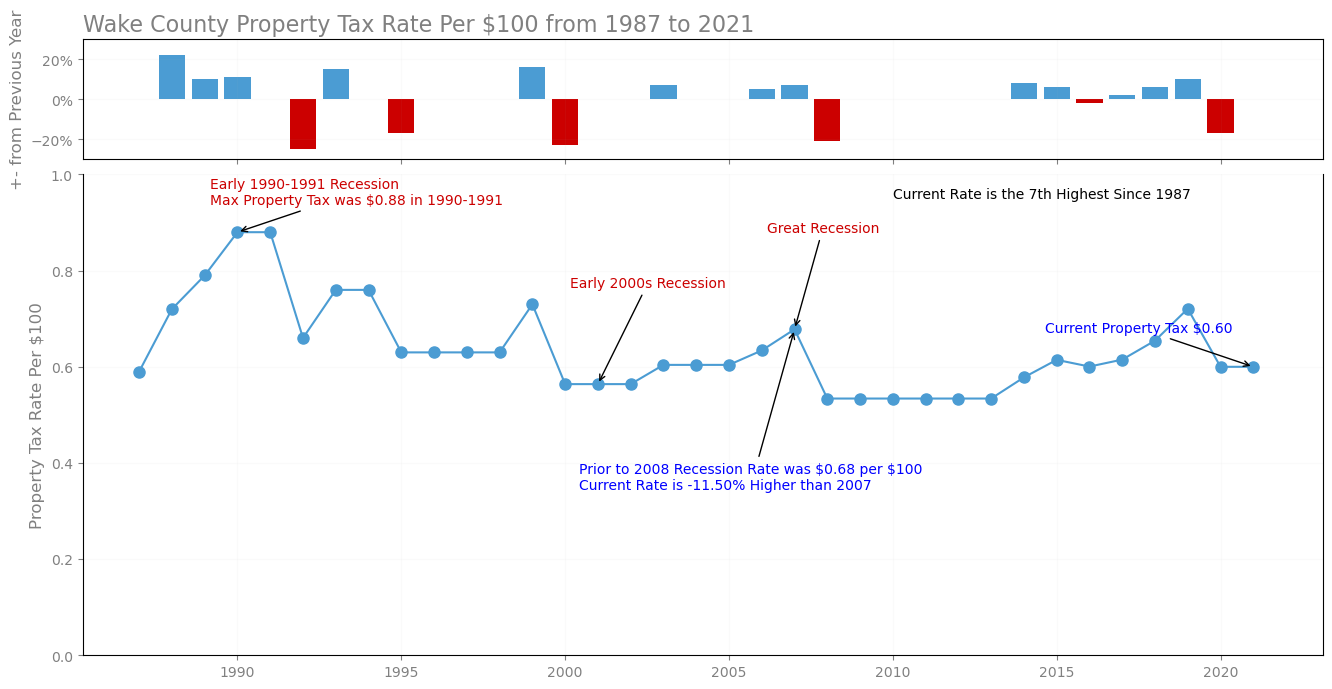

In [14]:
##
## Set Global Appearance Colors
##

## Figure size
size=(16,8)

## graph main colors
rollingAvgColor='lightgray'
carolinaBlue='#4B9CD3'
ncStateRed='#CC0000'

## Graph appearance
textGray='gray'
gridAlpha=.05
plt.rcParams['axes.titlesize']=16
plt.rcParams['axes.titlecolor']=textGray
plt.rcParams['axes.titlelocation']='left'

## Modify x and y axes
plt.rcParams['axes.labelsize']=12
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
plt.rcParams['ytick.color']=textGray
plt.rcParams['xtick.color']=textGray
plt.rcParams['axes.labelcolor']=textGray


#fig, (ax1,ax2) = plt.subplots(2,figsize=size, sharex=True, gridspec_kw={'height_ratios': [4, 1]})
fig, (ax2,ax1) = plt.subplots(2,figsize=size, sharex=True, gridspec_kw={'height_ratios': [1, 4]})
plt.subplots_adjust(hspace=0.05)
###################################################################################
## Line plot ax1
###################################################################################

## Rolling average
#ax1.plot(df.index, df['RollingAvg'],
#        color=rollingAvgColor)

## Plot tax rate by year
ax1.plot(df.index, df['wcTax'], 
         marker='o', markersize=8, color=carolinaBlue, label='Without Bonds')
#ax1.xaxis.tick_top()

## Apprearance ax1
ax1.grid(alpha=gridAlpha)
#ax1.set_xticks(x)
ax1.text(2010,.95,f'Current Rate is the 7th Highest Since {minYear}')
ax1.set_ylabel('Property Tax Rate Per $100')
ax1.set_ylim(0,1)

#ax1.annotate('Max Property Tax was ${:.2f}\nin 1990-1991'.format(maxTaxValue),[maxTaxYear,maxTaxValue], xytext=(0.05,.3), xycoords='axes fraction')
ax1.annotate(f'Current Property Tax ${currRate:.2f}',
             [currYear,currRate], 
             xytext=(-150,25), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), color='blue')

ax1.annotate(f'Prior to 2008 Recession Rate was ${recRate:.2f} per \$100 \nCurrent Rate is {diffRec:.2%} Higher than 2007',
             [2007,recRate], 
             xytext=(-155,-115), 
             textcoords='offset points', 
             arrowprops=dict(arrowstyle='->'), 
             color='blue')

ax1.annotate(f'Early 1990-1991 Recession\nMax Property Tax was ${maxTaxValue:.2f} in 1990-1991',
             [1990,df.loc[1990,'wcTax']], xytext=(-20,20), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), 
             color=ncStateRed)

ax1.annotate('Early 2000s Recession',[2001,df.loc[2001,'wcTax']], 
             xytext=(-20,70), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), 
             color=ncStateRed)

ax1.annotate('Great Recession',[2007,df.loc[2007,'wcTax']], 
             xytext=(-20,70), 
             textcoords='offset points',
             arrowprops=dict(arrowstyle='->'), 
             color=ncStateRed)




###################################################################################
## Bar plot ax2
###################################################################################
ax2.bar(df.index, df['pctIncrease'], 
        color=(df['pctIncrease'] > 0).map({True: carolinaBlue,False: ncStateRed}))

##Appearnace ax2
ax2.grid(alpha=gridAlpha)
#ax2.set_xticks(x)
#ax2.set_xticks([])
ax2.set_ylim(-.3,.3)
ax2.set_title(f'Wake County Property Tax Rate Per $100 from {minYear} to {maxYear}')
#ax2.set_title('Percent Increase or Decrease from the Previous Year', loc='left')
ax2.set_ylabel('+- from Previous Year')
ax2.yaxis.set_major_formatter(PercentFormatter(1))


ax1.spines['top'].set_visible(False)



Source='http://www.wakegov.com/tax/taxratesfees/Pages/default.aspx'
Source='Recession Source:https://en.wikipedia.org/wiki/List_of_recessions_in_the_United_States'


#fig.tight_layout()
plt.savefig('images//wcTax.jpg')